In [1]:
import tensorflow as tf
import pandas as pd
import ast
!pip install -U nltk
from nltk.tokenize import sent_tokenize, word_tokenize
!pip install -U gensim
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import SpectralClustering

!pip install -U ipywidgets

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
!pip install -U seaborn
import seaborn as sns
from nltk.data import find

!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer
import logging
from transformers import logging as hf_logging
from transformers import LongformerModel, LongformerTokenizer

import torch

D0530 07:03:27.447953142      13 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0530 07:03:27.447984390      13 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0530 07:03:27.447988354      13 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0530 07:03:27.447991219      13 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0530 07:03:27.447993719      13 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0530 07:03:27.447996445      13 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0530 07:03:27.447998872      13 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0530 07:03:27.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.5 MB ? eta -:--:--


     ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.4/1.5 MB 10.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.5/1.5 MB 27.8 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.7 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/771.9 KB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.9/771.9 KB 33.8 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/26.5 MB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/26.5 MB 9.2 MB/s eta 0:00:03
     ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/26.5 MB 40.7 MB/s eta 0:00:01


     ━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/26.5 MB 75.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 13.2/26.5 MB 149.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 18.4/26.5 MB 152.0 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 23.7/26.5 MB 150.7 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 145.4 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 145.4 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.5/26.5 MB 145.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 47.3 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/56.8 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 KB 4.4 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/138.3 KB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━ 133.1/138.3 KB 5.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 KB 3.5 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/198.2 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.2/198.2 KB 9.7 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.1 MB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 2.1/2.1 MB 82.2 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.8 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/293.3 KB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 286.7/293.3 KB 10.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 7.2 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/86.0 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.7 MB/s eta 0:00:00


  Preparing metadata (setup.py) ... -

 done


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/7.1 MB ? eta -:--:--


     ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/7.1 MB 52.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━ 6.5/7.1 MB 93.6 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 7.1/7.1 MB 93.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 55.6 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/1.3 MB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.1 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/224.5 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 KB 18.5 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/160.1 KB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.1/160.1 KB 11.6 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/7.8 MB ? eta -:--:--


     ━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━ 5.2/7.8 MB 156.3 MB/s eta 0:00:01


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 7.8/7.8 MB 153.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.5 MB/s eta 0:00:00


 \

 done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=2a45e7981b0c11f2f4e880ef2510f229db7e9ea7d42375d31fcc5d3be851fde5
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe


Successfully built sentence-transformers


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
full_data = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [3]:
# Data Preprocessing
imp_data = full_data[['id', 'overview', 'title', 'keywords']]

summaries = imp_data['overview'][:360].reset_index(drop=True)
keywords = imp_data['keywords'][:360].reset_index(drop=True)
titles = imp_data['title'][:360].reset_index(drop=True)
ids = imp_data['id'][:360].reset_index(drop=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# print(summaries)
# print(keywords.head())

In [4]:
# Get Keyword Embeddings Average for Movies using Word2Vec
import gensim
from gensim.models import Word2Vec
import json
import numpy as np
import nltk
nltk.download('word2vec_sample')

# Parse the JSON and extract the 'name' values
keywords = keywords.apply(lambda x: [keyword['name'] for keyword in json.loads(x)])

# skip-gram on Google News data
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

# Get the Word2Vec embeddings of the keywords and take their mean
keyword_embeddings = []

for keyword_list in keywords:
    embedding_list = []
    for keyword in keyword_list:
        # Check if the word is in the model's vocabulary
        if keyword in word2vec_model:
            embedding = word2vec_model[keyword]
            embedding_list.append(embedding)
    # Take the mean of all keyword embeddings for this movie
    if embedding_list:
        keyword_embedding = np.mean(embedding_list, axis=0)
    else:
        keyword_embedding = np.zeros(300)  # assuming the embeddings are of size 300
    keyword_embeddings.append(keyword_embedding)

keyword_embeddings = np.array(keyword_embeddings)

[nltk_data] Downloading package word2vec_sample to /root/nltk_data...


[nltk_data]   Unzipping models/word2vec_sample.zip.


In [5]:
# Set TPU strategy
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: local


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


In [6]:
import tensorflow as tf
from transformers import TFLongformerModel, LongformerTokenizer
import numpy as np
import gc
import time
import sys

# Tokenize all the summaries
def longformer_tokenize_data(tokenizer, summaries):
    tokenized_summaries = []
    for summary in summaries:
        # Tokenize the text
        tokenized_summary = tokenizer(summary, truncation=True, max_length=4096, padding='max_length', return_tensors="tf")
        tokenized_summaries.append(tokenized_summary)
    return tokenized_summaries

# Wrap the model call in strategy.scope
with strategy.scope():
    model = TFLongformerModel.from_pretrained('allenai/longformer-base-4096')

# Instantiate the Longformer model and tokenizer
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')

# Tokenize summaries with LongformerTokenizer
#start = time.time()
processed_data = longformer_tokenize_data(tokenizer, summaries)
#stop = time.time()
#print("Tokenizer Step for all summaries: ", stop - start, " seconds")
#print("\n")

with strategy.scope():
    # Process the data
    summary_embeddings = []
    for i, data in enumerate(processed_data):
        # start2 = time.time()
        input_ids = data['input_ids']
        attention_mask = data['attention_mask']
        outputs = model(input_ids, attention_mask=attention_mask)
        summary_embeddings.append(outputs[0])
        # stop2 = time.time()
        # print("Time for embedding ", i, ": ", stop2 - start2, " seconds")

# Reshape output embeddings by taking the mean across sequence_length dimension
# and squeezing to remove batch_size dimension
embeddings = [np.mean(x.numpy(), axis=1).squeeze() for x in summary_embeddings]

# Memory Cleanup
del summary_embeddings
gc.collect()

# Set print options
np.set_printoptions(threshold=sys.maxsize)

embeddings = np.array(embeddings)

np.save('/kaggle/working/tmdb_360_summary_and_keyword_embeddings.npy', embeddings)

# Output: NumPy array of vector embeddings
print(embeddings.shape)

Some layers from the model checkpoint at allenai/longformer-base-4096 were not used when initializing TFLongformerModel: ['lm_head']
- This IS expected if you are initializing TFLongformerModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFLongformerModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


All the layers of TFLongformerModel were initialized from the model checkpoint at allenai/longformer-base-4096.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFLongformerModel for predictions without further training.


(360, 768)


In [7]:
# Concatenate the summary embeddings and keyword embeddings
all_embeddings = np.concatenate((embeddings, keyword_embeddings), axis=1)

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

number_of_clusters = 120

# Perform clustering with KMeans
clustering = KMeans(n_clusters=number_of_clusters, random_state=7).fit(all_embeddings)

# Assign labels to data points
labels = clustering.labels_

# Compute Davies-Bouldin Index
db_score = davies_bouldin_score(processed_data, labels)

print('Davies-Bouldin Index: ', db_score)


/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


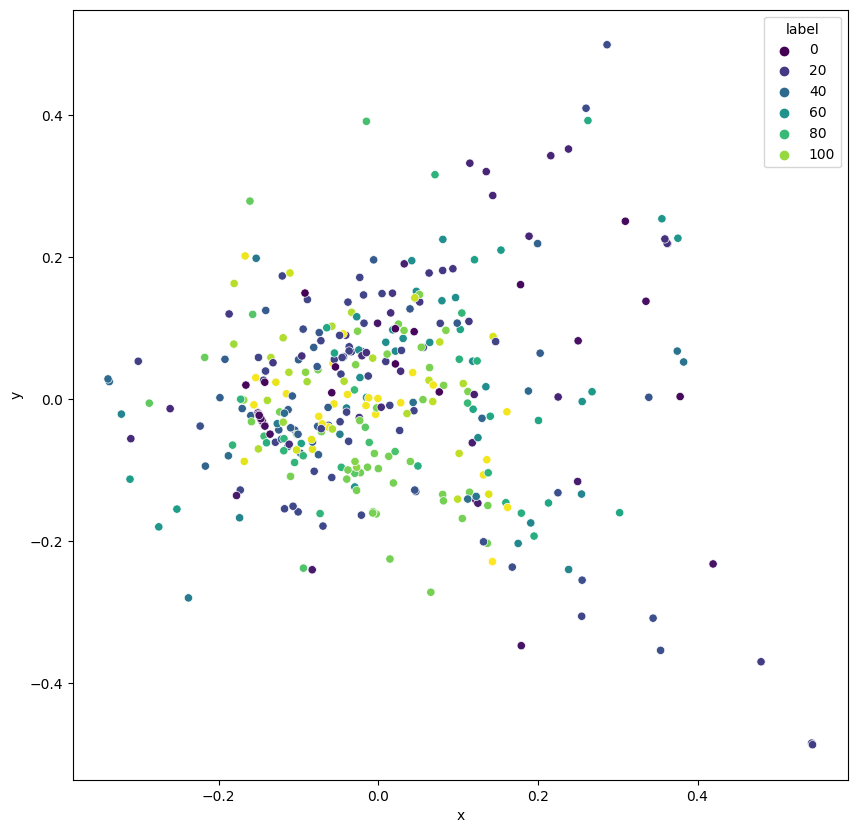

Cluster 0 summaries:
        ID            Title                                            Summary
309  10214  Son of the Mask  Tim Avery, an aspiring cartoonist, finds himse...


Cluster 1 summaries:
        ID                                  Title                                            Summary
98   49051      The Hobbit: An Unexpected Journey  Bilbo Baggins, a hobbit enjoying his quiet lif...
208   1911                       The 13th Warrior  In AD 922, Arab courtier, Ahmad Ibn Fadlan acc...
330    121  The Lord of the Rings: The Two Towers  Frodo and Sam are trekking to Mordor to destro...


Cluster 2 summaries:
         ID                            Title                                            Summary
104     503                         Poseidon  A packed cruise ship traveling the Atlantic is...
105  241259  Alice Through the Looking Glass  In the sequel to Tim Burton's "Alice in Wonder...
138   10196               The Last Airbender  The story follows the adventures of A

In [9]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the processed_data_array
num_samples, embedding_dim = all_embeddings.shape

reshaped_data_array = all_embeddings.reshape(num_samples, embedding_dim)

# PCA for dimension reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(reshaped_data_array)

# Create a DataFrame for easy plotting
df = pd.DataFrame(reduced_data, columns=['x', 'y'])
df['label'] = clustering.labels_
df['Title'] = titles
df['Summary'] = summaries
df['ID'] = ids

# Plot using seaborn
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='x', y='y', hue='label', palette='viridis', legend=True)
plt.show()

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 50)

# Print out summaries from each cluster
for i in range(number_of_clusters):  # Change this range depending on which clusters you want to look at
    print(f'Cluster {i} summaries:')
    print(df[df['label'] == i][['ID', 'Title', 'Summary']])
    print('\n')

In [10]:
# Get largest cluster size

# cluster_counts = df['label'].value_counts()
# largest_cluster = cluster_counts.idxmax()
# largest_cluster_size = cluster_counts.max()

# print(f"The largest cluster is: {largest_cluster} with size: {largest_cluster_size}")